In [18]:
import numpy as np # for working with arrays
np.set_printoptions(suppress=True) # not a must but nice to avoid scientific notation
import pandas as pd # as usual for handling dataframes
pd.options.display.float_format = '{:.4f}'.format #same for pandas to turn off scientific notation
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
dataset = pd.read_csv('./data/wine.csv')
dataset.shape

(178, 15)

In [20]:
dataset.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.2300,1.7100,2.4300,15.6000,127,2.8000,3.0600,0.2800,2.2900,5.6400,1.0400,3.9200,1065
1,1,Barolo,13.2000,1.7800,2.1400,11.2000,100,2.6500,2.7600,0.2600,1.2800,4.3800,1.0500,3.4000,1050
2,1,Barolo,13.1600,2.3600,2.6700,18.6000,101,2.8000,3.2400,0.3000,2.8100,5.6800,1.0300,3.1700,1185
3,1,Barolo,14.3700,1.9500,2.5000,16.8000,113,3.8500,3.4900,0.2400,2.1800,7.8000,0.8600,3.4500,1480
4,1,Barolo,13.2400,2.5900,2.8700,21.0000,118,2.8000,2.6900,0.3900,1.8200,4.3200,1.0400,2.9300,735


In [21]:
dataset.describe()

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,1.9382,13.0006,2.3363,2.3665,19.4949,99.7416,2.2951,2.0293,0.3619,1.5909,5.0581,0.9574,2.6117,746.8933
std,0.7750,0.8118,1.1171,0.2743,3.3396,14.2825,0.6259,0.9989,0.1245,0.5724,2.3183,0.2286,0.7100,314.9075
min,1.0000,11.0300,0.7400,1.3600,10.6000,70.0000,0.9800,0.3400,0.1300,0.4100,1.2800,0.4800,1.2700,278.0000
25%,1.0000,12.3625,1.6025,2.2100,17.2000,88.0000,1.7425,1.2050,0.2700,1.2500,3.2200,0.7825,1.9375,500.5000
50%,2.0000,13.0500,1.8650,2.3600,19.5000,98.0000,2.3550,2.1350,0.3400,1.5550,4.6900,0.9650,2.7800,673.5000
75%,3.0000,13.6775,3.0825,2.5575,21.5000,107.0000,2.8000,2.8750,0.4375,1.9500,6.2000,1.1200,3.1700,985.0000
max,3.0000,14.8300,5.8000,3.2300,30.0000,162.0000,3.8800,5.0800,0.6600,3.5800,13.0000,1.7100,4.0000,1680.0000


In [22]:
# Assuming 'wine_name' is the column with non-numeric data
numeric_data = dataset.drop(columns=['class_name'])
correlation = numeric_data.corr()
correlation

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
class_label,1.0000,-0.3282,0.4378,-0.0496,0.5179,-0.2092,-0.7192,-0.8475,0.4891,-0.4991,0.2657,-0.6174,-0.7882,-0.6337
alcohol,-0.3282,1.0000,0.0944,0.2115,-0.3102,0.2708,0.2891,0.2368,-0.1559,0.1367,0.5464,-0.0717,0.0723,0.6437
malic_acid,0.4378,0.0944,1.0000,0.1640,0.2885,-0.0546,-0.3352,-0.4110,0.2930,-0.2207,0.2490,-0.5613,-0.3687,-0.1920
ash,-0.0496,0.2115,0.1640,1.0000,0.4434,0.2866,0.1290,0.1151,0.1862,0.0097,0.2589,-0.0747,0.0039,0.2236
alcalinity_of_ash,0.5179,-0.3102,0.2885,0.4434,1.0000,-0.0833,-0.3211,-0.3514,0.3619,-0.1973,0.0187,-0.2740,-0.2768,-0.4406
magnesium,-0.2092,0.2708,-0.0546,0.2866,-0.0833,1.0000,0.2144,0.1958,-0.2563,0.2364,0.2000,0.0554,0.0660,0.3934
total_phenols,-0.7192,0.2891,-0.3352,0.1290,-0.3211,0.2144,1.0000,0.8646,-0.4499,0.6124,-0.0551,0.4337,0.6999,0.4981
flavanoids,-0.8475,0.2368,-0.4110,0.1151,-0.3514,0.1958,0.8646,1.0000,-0.5379,0.6527,-0.1724,0.5435,0.7872,0.4942
nonflavanoid_phenols,0.4891,-0.1559,0.2930,0.1862,0.3619,-0.2563,-0.4499,-0.5379,1.0000,-0.3658,0.1391,-0.2626,-0.5033,-0.3114
proanthocyanins,-0.4991,0.1367,-0.2207,0.0097,-0.1973,0.2364,0.6124,0.6527,-0.3658,1.0000,-0.0252,0.2955,0.5191,0.3304


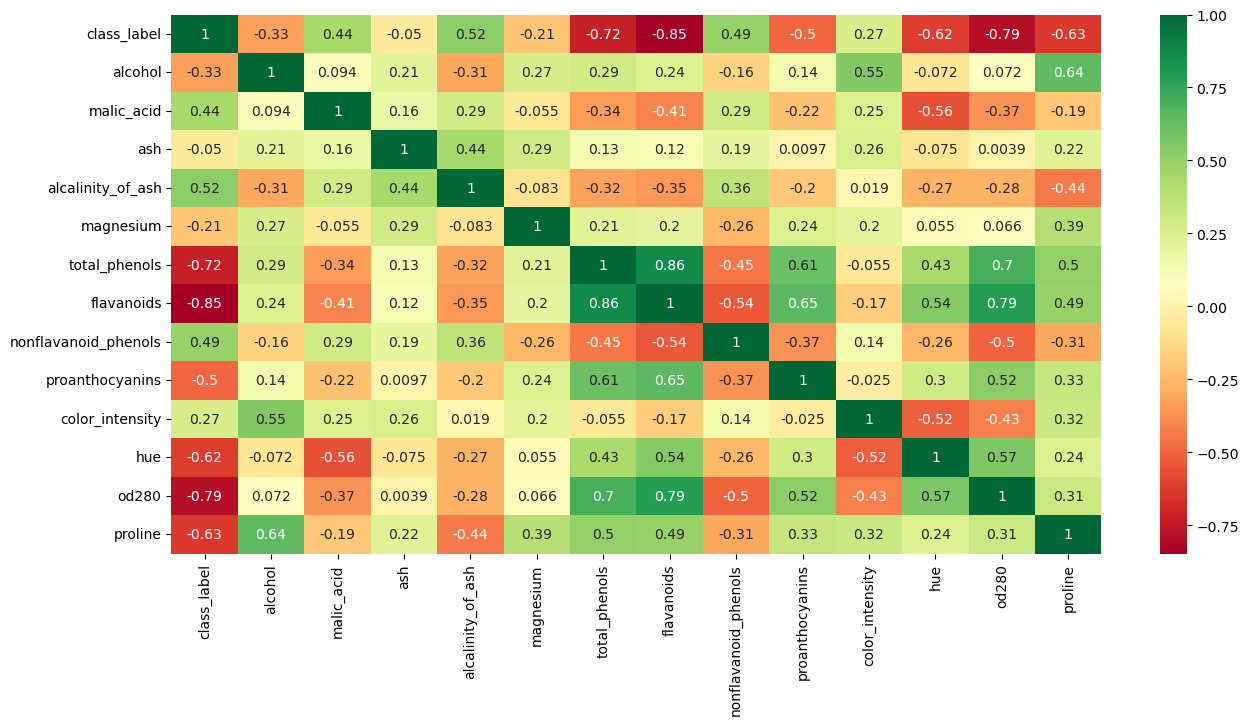

In [24]:

plt.figure(figsize=(15,7))
# plot heat map
g=sns.heatmap(correlation,cmap="RdYlGn", annot=True) # annot=True: nếu muốn in cả giá trị
plt.show()